In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
df = pd.read_csv('yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
df.shape

(10000, 10)

In [5]:
yelp_class = df[(df.stars==1)|(df.stars==5)]

In [6]:
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1


In [9]:
X = yelp_class['text'].values #use values to be numpy array
y = yelp_class['stars'].values

In [12]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [16]:
re.sub('[a-zA-Z]','?',X[0]) #Replaces all occurrences of a character or patter with a replacement string.
# يستبدل الحروف الكبيرة والصغيره بالاستفهام مع ترك الرموز الاخرى مثل ماهي

'?? ???? ???? ?? ???? ?? ?? ???????? ??? ????????? ??? ?? ??? ?????????.  ??? ??????? ??? ??????? ????? ???? ??????? ??????? ??????????? ????? ??????? ?? ???????? ????????.  ??? ???????? ??? ????????? ??? ??? ???? ??????? ??????? ?? ??? ????-???? ???????? ???????.  ?? ?????? ???? ??? ????? ????? ?? ?????? ??????? ?? ??? ??????? ??? ??? ???? ??? ??????.\n\n?? ???????? ? ????? ??? ??? ????? ?????? ????.  ?? ??? ?????????? ??? ?????? ??? ???? ?\'?? ???? ???.  ?\'? ?????? ???? ???? ???? ??? ??????????? ???? ????? ?????? ??? ????? ???? ????? ???? ??? ????? ??.  ?? ??? ???????.\n\n????? ?????????? ?? ??? ???? ????? ?????????, ? ??? ??? ????? ??????? ????????? ???? ????????? ??????? ??? ?? ??? ????? ??? ?????????.  ?? ???? ???? 2 ?????? ?? ????? ???????? ????? ???? ??? ??????? ??? ?? ?????????? ???? ??? ???? ????????.  ?? ??? ??? ???? "?????" ?\'?? ???? ???.\n\n??????, ? ???\'? ???? ?? ?? ????!'

In [18]:
re.sub('[^a-zA-Z]','?',X[0]) #Replaces all occurrences of a character or patter with a replacement string.
# هنا استخدمت رمز ^ يعكس الفعل يحول الرموز والمسافات إلى الشيء اللي ابغاه ياخذ مكانها رمز كان او احرف ويترك الكلمات مثل ما هي

'My?wife?took?me?here?on?my?birthday?for?breakfast?and?it?was?excellent???The?weather?was?perfect?which?made?sitting?outside?overlooking?their?grounds?an?absolute?pleasure???Our?waitress?was?excellent?and?our?food?arrived?quickly?on?the?semi?busy?Saturday?morning???It?looked?like?the?place?fills?up?pretty?quickly?so?the?earlier?you?get?here?the?better???Do?yourself?a?favor?and?get?their?Bloody?Mary???It?was?phenomenal?and?simply?the?best?I?ve?ever?had???I?m?pretty?sure?they?only?use?ingredients?from?their?garden?and?blend?them?fresh?when?you?order?it???It?was?amazing???While?EVERYTHING?on?the?menu?looks?excellent??I?had?the?white?truffle?scrambled?eggs?vegetable?skillet?and?it?was?tasty?and?delicious???It?came?with???pieces?of?their?griddled?bread?with?was?amazing?and?it?absolutely?made?the?meal?complete???It?was?the?best??toast??I?ve?ever?had???Anyway??I?can?t?wait?to?go?back?'

In [19]:
re.sub('[^a-zA-Z]',' ',X[0]) #Replaces all occurrences of a character or patter with a replacement string.
# هنا اخترت ان يكون البديل مسافة لاي رمز فكذا نظف النص من اي رموز اخرى

'My wife took me here on my birthday for breakfast and it was excellent   The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   Our waitress was excellent and our food arrived quickly on the semi busy Saturday morning   It looked like the place fills up pretty quickly so the earlier you get here the better   Do yourself a favor and get their Bloody Mary   It was phenomenal and simply the best I ve ever had   I m pretty sure they only use ingredients from their garden and blend them fresh when you order it   It was amazing   While EVERYTHING on the menu looks excellent  I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   It came with   pieces of their griddled bread with was amazing and it absolutely made the meal complete   It was the best  toast  I ve ever had   Anyway  I can t wait to go back '

In [20]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk

corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]',' ',X[i]) # cheaning
    review = review.lower() # convert words to lower case
    review = nltk.word_tokenize(review) #convert whole sentences to tokiens of words
    ps = PorterStemmer()
    stop_words = stopwords.words('english')
    stop_words.remove('not') # it means 'not' words will stay with us
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)
corpus

['wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back',
 'idea peopl give bad review place goe show pleas everyon probabl gripe someth fault mani peopl like case friend arriv pm past sunday pretti crowd thought sunday even thought would wait forev get seat said seat girl come back seat someon els seat waiter came got drink order everyon pleasant host seat us waiter server price good well place order decid want share bake spaghetti calzon small beef pizza tri calzon huge got smallest one person got small pizza awesom friend like pizza better like calzon better calzon

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
print(len(cv.get_feature_names_out()))

12998


In [25]:
pd.DataFrame(X, columns=cv.get_feature_names_out())

,aa,aaa,aaaamaz,aaammmazz,aaron,ab,aback,abandon,abba,abbi,...,zucca,zucchini,zuccini,zuchinni,zumba,zupa,zuzu,zwftv,zwiebel,zzed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
preds = clf.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))

[[100 128]
 [  1 997]]


NameError: name 'plt' is not defined

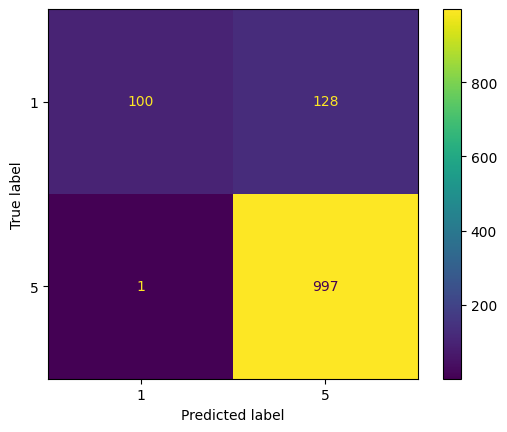

In [36]:
cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, preds))